# <u>Classification for Titanic Dataset </u>

<b>The Challenge</b>

<u>The sinking of the Titanic is one of the most infamous shipwrecks in history.</u>

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc). 

In [1]:
test_path = 'D:/Datasets/Titanic/test.csv'
train_path = 'D:/Datasets/Titanic/train.csv'

In [2]:
import pandas as pd 

test_data = pd.read_csv(test_path)
train_data = pd.read_csv(train_path)

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Explore Data

*  See if there is a Correlation between Pclass and Fare 

In [3]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [6]:
train_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [7]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Curious to see if there is a price range for each class 

In [23]:
# Pclass 1 price range 

pclass_1 = train[train['Pclass']==1]
print(pclass_1['Fare'].min())
print(pclass_1['Fare'].max())

0.0
512.3292


In [24]:
pclass_1['Fare'].median()

71.0

In [25]:
# Pclass 2 price range 

pclass_2 = train[train['Pclass']==2]
print(pclass_2['Fare'].min())
print(pclass_2['Fare'].max())

10.5
39.0


In [26]:
pclass_2['Fare'].median()

13.39585

In [27]:
# Pclass 3 price range 

pclass_3 = train[train['Pclass']==3]
print(pclass_3['Fare'].min())
print(pclass_3['Fare'].max())

7.65
22.3583


In [28]:
pclass_3['Fare'].median()

10.4625

# <u>I. Cabins </u> 



### There's too many missing cabins. I'll build a classification model to classify the cabins. First, i'll need to remove the room number from the deck letter. For the missing values (NaN), I'll make those Deck passgengers since most likely means they didn't have a cabin. Fare seems to what most likely defines which Pclass and Cabin section. I'll have two training sets, one where the data set has been stratified using the Fare bins, and another where the dataset hasn't been stratified. 



In [3]:
train_data.Cabin.sort_values(ascending=True).unique()

# A, B, C, D, E, F, G, T, nan 

array(['A10', 'A14', 'A16', 'A19', 'A20', 'A23', 'A24', 'A26', 'A31',
       'A32', 'A34', 'A36', 'A5', 'A6', 'A7', 'B101', 'B102', 'B18',
       'B19', 'B20', 'B22', 'B28', 'B3', 'B30', 'B35', 'B37', 'B38',
       'B39', 'B4', 'B41', 'B42', 'B49', 'B5', 'B50', 'B51 B53 B55',
       'B57 B59 B63 B66', 'B58 B60', 'B69', 'B71', 'B73', 'B77', 'B78',
       'B79', 'B80', 'B82 B84', 'B86', 'B94', 'B96 B98', 'C101', 'C103',
       'C104', 'C106', 'C110', 'C111', 'C118', 'C123', 'C124', 'C125',
       'C126', 'C128', 'C148', 'C2', 'C22 C26', 'C23 C25 C27', 'C30',
       'C32', 'C45', 'C46', 'C47', 'C49', 'C50', 'C52', 'C54', 'C62 C64',
       'C65', 'C68', 'C7', 'C70', 'C78', 'C82', 'C83', 'C85', 'C86',
       'C87', 'C90', 'C91', 'C92', 'C93', 'C95', 'C99', 'D', 'D10 D12',
       'D11', 'D15', 'D17', 'D19', 'D20', 'D21', 'D26', 'D28', 'D30',
       'D33', 'D35', 'D36', 'D37', 'D45', 'D46', 'D47', 'D48', 'D49',
       'D50', 'D56', 'D6', 'D7', 'D9', 'E10', 'E101', 'E12', 'E121',
       'E17',

In [4]:
train_data.Cabin.isnull().sum()

687

In [5]:
train_data.shape

(891, 12)

# <u>II. Missing Cabins (NaN)</u>

* How many Cabins have a fare and Pclass but NaN for Cabin? 

This should allow me to be able to manually fill some Cabin values based off of assumptions. 

In [6]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
# These are Deck passengers

fare = train_data[train_data['Fare']==0.0]
fare[fare['Pclass']==3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S


In [8]:
train_data[train_data['Ticket']=='LINE']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S


In [9]:
fare[fare['Pclass']==2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
674,675,0,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.0,NaN,S
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0,NaN,S


In [44]:
# These need Cabin F and Fare of 26.0

fare.loc[fare["Ticket"].str.startswith("239")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
674,675,0,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.0,NaN,S
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0,NaN,S


In [40]:
train_data.loc[train_data["Ticket"].str.startswith("239")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
20,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
674,675,0,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.0,NaN,S
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0,NaN,S
791,792,0,2,"Gaskell, Mr. Alfred",male,16.0,0,0,239865,26.0,NaN,S


In [43]:
#fare.loc[fare["Cabin"].str.startswith("")]

import numpy as np 

mask = np.column_stack([train_data['Cabin'].str.contains(r"G", na=False) for col in train_data])
train_data.loc[mask.any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
75,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S
251,252,0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29.0,1,1,347054,10.4625,G6,S
394,395,1,3,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,PP 9549,16.7000,G6,S
699,700,0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",male,42.0,0,0,348121,7.6500,F G63,S
715,716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,7.6500,F G73,S


In [24]:
train_data.loc[(train_data.Pclass==2) & (train_data.Cabin.notnull())].sort_values(['Cabin'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
292,293,0,2,"Levy, Mr. Rene Jacques",male,36.0,0,0,SC/Paris 2163,12.8750,D,C
327,328,1,2,"Ball, Mrs. (Ada E Hall)",female,36.0,0,0,28551,13.0000,D,S
473,474,1,2,"Jerwan, Mrs. Amin S (Marie Marthe Thuillard)",female,23.0,0,0,SC/AH Basle 541,13.7917,D,C
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
123,124,1,2,"Webber, Miss. Susan",female,32.5,0,0,27267,13.0000,E101,S
303,304,1,2,"Keane, Miss. Nora A",female,NaN,0,0,226593,12.3500,E101,Q
717,718,1,2,"Troutt, Miss. Edwina Celia ""Winnie""",female,27.0,0,0,34218,10.5000,E101,S
772,773,0,2,"Mack, Mrs. (Mary)",female,57.0,0,0,S.O./P.P. 3,10.5000,E77,S
148,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.5,0,2,230080,26.0000,F2,S
193,194,1,2,"Navratil, Master. Michel M",male,3.0,1,1,230080,26.0000,F2,S


## <u>Findings: </u> <u>Pclass 2</u> with <u>Ticket</u> number <u>starting with 239</u> has a <u>Fare price of 26.00</u> and <u>Cabin starting with letter <b>F</b></u> 

In [11]:
fare[fare['Pclass']==1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,A36,S
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0,B102,S
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,NaN,S


In [46]:
train_data.loc[train_data["Ticket"].str.startswith("112")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
209,210,1,1,"Blank, Mr. Henry",male,40.0,0,0,112277,31.0,A31,C
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6,NaN,C
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,A36,S
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0,B102,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0,B42,S


In [47]:
train_data.loc[train_data["Ticket"].str.startswith("199")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.50,C52,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
224,225,1,1,"Hoyt, Mr. Frederick Maxfield",male,38.0,1,0,19943,90.00,C93,S
245,246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.00,C78,Q
298,299,1,1,"Saalfeld, Mr. Adolphe",male,NaN,0,0,19988,30.50,C106,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
412,413,1,1,"Minahan, Miss. Daisy E",female,33.0,1,0,19928,90.00,C78,Q
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.00,C23 C25 C27,S
460,461,1,1,"Anderson, Mr. Harry",male,48.0,0,0,19952,26.55,E12,S


## <u><b>Assumption: </b></u>

* Ticket number starting with 1 = Pclass 1 (Cabins A, B)
* Ticket number starting with 2 = Pclass 2 (Cabins D, E, F)
* Ticket number with LINE = Pclass is Deck/No Cabin (Cabins Deck, G, T)

In [4]:
# Update Cabins according to class 

def update_cabins(cabin, pclass, fare):
        if pd.isnull(cabin) and pclass==1 and fare==0.0:
            cabin='A'
        if pd.isnull(cabin) and pclass==2 and fare==0.0:
            cabin='F'
        if pd.isnull(cabin) and pclass==3 and fare==0.0:
            cabin='On_Deck'
        else:
            cabin=cabin
        return cabin 

# Use apply method using lambda function 

fare['new_col'] = fare.apply(lambda x: update_cabins(x['Cabin'], x['Pclass'], x['Fare']), axis=1)

fare[fare['new_col']=='On_Deck']

ipykernel_launcher:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,new_col
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,On_Deck
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,On_Deck
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,On_Deck
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,On_Deck


# Fill some missing Cabins based on my findings.
Create a new column with the updated values. 

In [5]:
copied_train = train_data.copy()
copied_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
copied_train.loc[(copied_train['PassengerId'] == 823), 'Cabin'] = 'C'
copied_train.loc[(copied_train['PassengerId'] == 823), 'Fare'] = 90.00


In [7]:
copied_train[copied_train['PassengerId']== 823]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,90.0,C,S


In [7]:
copied_train.loc[(copied_train['PassengerId'] == 634), 'Cabin'] = 'B'
copied_train.loc[(copied_train['PassengerId'] == 634), 'Fare'] = 30.00
# Pclass 2
copied_train.loc[(copied_train['PassengerId'] == 278), 'Cabin'] = 'F'
copied_train.loc[(copied_train['PassengerId'] == 278), 'Fare'] = 26.00
copied_train.loc[(copied_train['PassengerId'] == 414), 'Cabin'] = 'F'
copied_train.loc[(copied_train['PassengerId'] == 414), 'Fare'] = 26.00
copied_train.loc[(copied_train['PassengerId'] == 467), 'Cabin'] = 'F'
copied_train.loc[(copied_train['PassengerId'] == 467), 'Fare'] = 26.00
copied_train.loc[(copied_train['PassengerId'] == 482), 'Cabin'] = 'F'
copied_train.loc[(copied_train['PassengerId'] == 482), 'Fare'] = 26.00
copied_train.loc[(copied_train['PassengerId'] == 675), 'Cabin'] = 'F'
copied_train.loc[(copied_train['PassengerId'] == 675), 'Fare'] = 26.00
copied_train.loc[(copied_train['PassengerId'] == 733), 'Cabin'] = 'F'
copied_train.loc[(copied_train['PassengerId'] == 733), 'Fare'] = 26.00
# Pclass 3
copied_train.loc[(copied_train['PassengerId'] == 180), 'Cabin'] = 'On_Deck'
copied_train.loc[(copied_train['PassengerId'] == 272), 'Cabin'] = 'On_Deck'
copied_train.loc[(copied_train['PassengerId'] == 303), 'Cabin'] = 'On_Deck'
copied_train.loc[(copied_train['PassengerId'] == 598), 'Cabin'] = 'On_Deck'

In [5]:
copied_train[copied_train['Cabin']=='On_Deck']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,On_Deck,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,On_Deck,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,On_Deck,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,On_Deck,S


In [6]:
copied_train[copied_train['Cabin']=='F']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,26.0,F,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,26.0,F,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,26.0,F,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,26.0,F,S
674,675,0,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,26.0,F,S
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,26.0,F,S


# <u>III. Format Cabins data  

* Seperate the NaN values with None 
* Remove the numbers from the character in the Cabin column

In [8]:
nan_cabins = copied_train[copied_train['Cabin'].isnull()]
X_train = copied_train[copied_train['Cabin'].notnull()]

In [10]:
X_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [72]:
nan_cabins.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [10]:
print(X_train.shape)
print(nan_cabins.shape)

(216, 12)
(675, 12)


In [9]:
def cab_letter(cabin):
    list_a = [i for i in cabin['Cabin'] if i.startswith('A')]
    list_b = [i for i in cabin['Cabin'] if i.startswith('B')]
    list_c = [i for i in cabin['Cabin'] if i.startswith('C')]
    list_d = [i for i in cabin['Cabin'] if i.startswith('D')]
    list_e = [i for i in cabin['Cabin'] if i.startswith('E')]
    list_f = [i for i in cabin['Cabin'] if i.startswith('F')]
    list_g = [i for i in cabin['Cabin'] if i.startswith('G')]
    list_t = [i for i in cabin['Cabin'] if i.startswith('T')]
    list_n = [i for i in cabin['Cabin'] if i.startswith('N')]
    list_deck = [i for i in cabin['Cabin'] if i.startswith('O')]

    cabin['Cabin_Section'] = cabin['Cabin'].replace(list_a, 'A').replace(list_b, 'B').replace(list_c, 'C').replace(list_d, 'D').replace(list_e, 'E').replace(list_f, 'F').replace(list_g, 'G').replace(list_t, 'T').replace(list_n, 'None').replace(list_deck, 'Deck')
    return cabin

In [10]:
X_train_copy = X_train.copy()
X_train_copy_format = cab_letter(X_train_copy)
X_train_copy_format.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Section
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,E
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,G
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,C


In [13]:
X_train_copy_format[X_train_copy_format['Cabin']=='On_Deck']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Section
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,On_Deck,S,Deck
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,On_Deck,S,Deck
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,On_Deck,S,Deck
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,On_Deck,S,Deck


In [13]:
X_train_copy_format.Cabin_Section.sort_values(ascending=True).unique()

array(['A', 'B', 'C', 'D', 'Deck', 'E', 'F', 'G', 'T'], dtype=object)

In [11]:
# Apply to X_train 
X_train = cab_letter(X_train)
X_train.head()

ipykernel_launcher:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Section
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,E
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,G
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,C


In [15]:
X_train.Cabin_Section.sort_values(ascending=True).unique()

array(['A', 'B', 'C', 'D', 'Deck', 'E', 'F', 'G', 'T'], dtype=object)

# <u> Part IV.</u> Clean Data & Preprocess for ML

* Drop columns less likely to be used as attributes
* Create a set that needs predicting/labeling 
* Create a Train and Test set
* Encode categorical columns 
* Create a <u>Pipeline for Preprocessing </u>

In [16]:
# Will have to use the test_data set to score/measure accuracy
test_data[test_data['Cabin'].notnull()].count()

PassengerId    91
Pclass         91
Name           91
Sex            91
Age            87
SibSp          91
Parch          91
Ticket         91
Fare           91
Cabin          91
Embarked       91
dtype: int64

In [12]:
# Only specific attributes will be needed to predict/label the cabin. Will remove a few columns. 

X_train = X_train_copy_format.drop(['Name', 'Sex', 'Age', 'Cabin', 'Cabin_Section', 'Survived'], axis=1) # Dripping Survived since it's not in the test set
y_train = X_train_copy_format[['Cabin_Section']]

In [13]:
X_train.head()

,PassengerId,Pclass,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,0,PC 17599,71.2833,C
3,4,1,1,0,113803,53.1000,S
6,7,1,0,0,17463,51.8625,S
10,11,3,1,1,PP 9549,16.7000,S
11,12,1,0,0,113783,26.5500,S


In [14]:
y_train.head()

,Cabin_Section
1,C
3,C
6,E
10,G
11,C


In [20]:
print(X_train.shape)
print(y_train.shape)

(216, 8)
(216, 1)


In [13]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 1 to 889
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  216 non-null    int64  
 1   Pclass       216 non-null    int64  
 2   SibSp        216 non-null    int64  
 3   Parch        216 non-null    int64  
 4   Ticket       216 non-null    object 
 5   Fare         216 non-null    float64
 6   Embarked     214 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 11.8+ KB


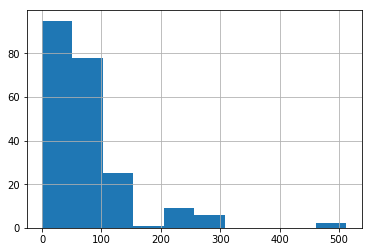

In [14]:
## Stratify based off of fare price ranges. Since Fare might be a good indicator of Cabin type. 

X_train['Fare'].hist()

In [17]:
import numpy as np 

X_train_1['Fare_Cat'] = pd.cut(X_train['Fare'], bins=[0., 10.46, 13.40, 71., np.inf],
labels=[1,2,3,4])

In [18]:
X_train_1['Fare_Cat'].value_counts()

3    104
4     85
2     14
1      6
Name: Fare_Cat, dtype: int64

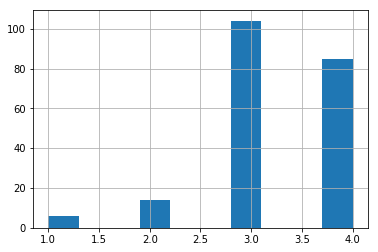

In [19]:
X_train_1['Fare_Cat'].hist()

In [24]:
X_train_1 = X_train.dropna()
X_train_1.isnull().sum()

PassengerId    0
Pclass         0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Fare_Cat       0
dtype: int64

In [25]:
X_train_1.shape

(207, 8)

## Stratifiy

In [28]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(X_train_1, X_train_1['Fare_Cat']):
    strat_train_set = X_train_1.reindex(train_index)
    strat_test_set = X_train_1.reindex(test_index)

In [29]:
# Correlation 

corr_matrix = X_train_1.corr()
corr_matrix['Pclass'].sort_values(ascending=False)

Pclass         1.000000
Parch          0.027563
PassengerId   -0.072626
SibSp         -0.115061
Fare          -0.335800
Name: Pclass, dtype: float64

In [13]:
corr_matrix_1 = X_train.corr()
corr_matrix_1['Pclass'].sort_values(ascending=False)

Pclass         1.000000
Parch         -0.002795
PassengerId   -0.094857
SibSp         -0.135767
Fare          -0.351499
Name: Pclass, dtype: float64

Very little change to correlations even with the dataset stratified. 

## a) Pre-processing 
* Encode Ticket, Embarked

In [30]:
X_train.head()

,PassengerId,Pclass,SibSp,Parch,Ticket,Fare,Embarked,Fare_Cat
1,2,1,1,0,PC 17599,71.2833,C,4
3,4,1,1,0,113803,53.1000,S,3
6,7,1,0,0,17463,51.8625,S,3
10,11,3,1,1,PP 9549,16.7000,S,3
11,12,1,0,0,113783,26.5500,S,3


In [22]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 1 to 889
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  215 non-null    int64  
 1   Survived     215 non-null    int64  
 2   Pclass       215 non-null    int64  
 3   SibSp        215 non-null    int64  
 4   Parch        215 non-null    int64  
 5   Ticket       215 non-null    object 
 6   Fare         215 non-null    float64
 7   Embarked     213 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 13.4+ KB


In [14]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

X_train_num = X_train.drop(['Embarked', 'Ticket'], axis=1)
cat_cols = X_train[['Ticket', 'Embarked']]

num_attribs = list(X_train_num)
cat_attribs = list(cat_cols)

cat_pipeline = Pipeline([

    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("encoder", OneHotEncoder())
])

# Pipeline without Polynomial 

scaled_pipeline = ColumnTransformer([
    ("cat_vals", cat_pipeline, cat_attribs),
    ("scaler", StandardScaler(), num_attribs)

])

# Pipeline to add polynomial features 

num_pipeline = Pipeline([

    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler())
])

poly_pipeline = ColumnTransformer([
    ("num_cols", num_pipeline, num_attribs),
    ("cat_cols", cat_pipeline, cat_attribs)

])

In [15]:
X_train_poly = poly_pipeline.fit_transform(X_train)

In [22]:
# Build a pipeline to drop columns, fillNA, separate the cabin Section from Numeric value. 

test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [48]:
test_data.shape

(418, 11)

In [51]:
test_data[test_data['Cabin'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# <u>Part VI Classification Models</u>

* linearSVC
* DecisionTreeClassifier/RandomForest

In [16]:
y_train_1d = y_train['Cabin_Section']
y_train_1d.head()

1     C
3     C
6     E
10    G
11    C
Name: Cabin_Section, dtype: object

In [17]:
# Scaled only 

X_train_scaled = scaled_pipeline.fit_transform(X_train)

In [21]:
# LinearSVC 
from sklearn.svm import LinearSVC
# svc_OvR
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

lin_svc = LinearSVC(multi_class='crammer_singer', random_state=42)

svc_ovr = OneVsRestClassifier(SVC(kernel='linear', probability=True,
                                 random_state=42))

In [20]:
X_train_poly.shape

(216, 236)

In [22]:
# Fit lin_svc

lin_svc.fit(X_train_scaled, y_train_1d)

C:\Users\Khemra\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\svm\_base.py:975: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(multi_class='crammer_singer', random_state=42)

In [23]:
# Fit svc_ovr 

svc_ovr.fit(X_train_scaled, y_train_1d)

OneVsRestClassifier(estimator=SVC(kernel='linear', probability=True,
                                  random_state=42))

In [24]:
## RandomForestClassifier 

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train_poly, y_train_1d)


RandomForestClassifier(random_state=42)

# Classification Reports 

In [27]:
# Test data 

test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [25]:
test_data_notnull = test_data[test_data['Cabin'].notnull()]
test_data_notnull.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
14,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
26,918,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C
28,920,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S


In [32]:
test_data_notnull.shape

(91, 11)

In [26]:
test_data_1 = test_data_notnull.drop(['Name', 'Sex'], axis=1)
test_data_1.head()

,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,23.0,1,0,21228,82.2667,B45,S
14,906,1,47.0,1,0,W.E.P. 5734,61.1750,E31,S
24,916,1,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
26,918,1,22.0,0,1,113509,61.9792,B36,C
28,920,1,41.0,0,0,113054,30.5000,A21,S


In [27]:
test_data_1.loc[(test_data_1['PassengerId'] == 823), 'Cabin'] = 'C'
test_data_1.loc[(test_data_1['PassengerId'] == 823), 'Fare'] = 90.00
test_data_1.loc[(test_data_1['PassengerId'] == 634), 'Cabin'] = 'B'
test_data_1.loc[(test_data_1['PassengerId'] == 634), 'Fare'] = 30.00
# Pclass 2
test_data_1.loc[(test_data_1['PassengerId'] == 278), 'Cabin'] = 'F'
test_data_1.loc[(test_data_1['PassengerId'] == 278), 'Fare'] = 26.00
test_data_1.loc[(test_data_1['PassengerId'] == 414), 'Cabin'] = 'F'
test_data_1.loc[(test_data_1['PassengerId'] == 414), 'Fare'] = 26.00
test_data_1.loc[(test_data_1['PassengerId'] == 467), 'Cabin'] = 'F'
test_data_1.loc[(test_data_1['PassengerId'] == 467), 'Fare'] = 26.00
test_data_1.loc[(test_data_1['PassengerId'] == 482), 'Cabin'] = 'F'
test_data_1.loc[(test_data_1['PassengerId'] == 482), 'Fare'] = 26.00
test_data_1.loc[(test_data_1['PassengerId'] == 675), 'Cabin'] = 'F'
test_data_1.loc[(test_data_1['PassengerId'] == 675), 'Fare'] = 26.00
test_data_1.loc[(test_data_1['PassengerId'] == 733), 'Cabin'] = 'F'
test_data_1.loc[(test_data_1['PassengerId'] == 733), 'Fare'] = 26.00
# Pclass 3
test_data_1.loc[(test_data_1['PassengerId'] == 180), 'Cabin'] = 'On_Deck'
test_data_1.loc[(test_data_1['PassengerId'] == 272), 'Cabin'] = 'On_Deck'
test_data_1.loc[(test_data_1['PassengerId'] == 303), 'Cabin'] = 'On_Deck'
test_data_1.loc[(test_data_1['PassengerId'] == 598), 'Cabin'] = 'On_Deck'



In [28]:
test_data_1.head()

,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,23.0,1,0,21228,82.2667,B45,S
14,906,1,47.0,1,0,W.E.P. 5734,61.1750,E31,S
24,916,1,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
26,918,1,22.0,0,1,113509,61.9792,B36,C
28,920,1,41.0,0,0,113054,30.5000,A21,S


In [29]:
# Format 
X_test_formatted = cab_letter(test_data_1)
X_test_formatted.head()

,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Section
12,904,1,23.0,1,0,21228,82.2667,B45,S,B
14,906,1,47.0,1,0,W.E.P. 5734,61.1750,E31,S,E
24,916,1,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C,B
26,918,1,22.0,0,1,113509,61.9792,B36,C,B
28,920,1,41.0,0,0,113054,30.5000,A21,S,A


In [30]:
X_test = X_test_formatted.drop(['Age', 'Cabin', 'Cabin_Section'], axis=1)

In [30]:
X_test.head()

,PassengerId,Pclass,SibSp,Parch,Ticket,Fare,Embarked
12,904,1,1,0,21228,82.2667,S
14,906,1,1,0,W.E.P. 5734,61.1750,S
24,916,1,1,3,PC 17608,262.3750,C
26,918,1,0,1,113509,61.9792,C
28,920,1,0,0,113054,30.5000,S


In [31]:
y_test = X_test_formatted['Cabin_Section']
y_test.head()

12    B
14    E
24    B
26    B
28    A
Name: Cabin_Section, dtype: object

In [37]:
X_test.shape

(91, 7)

In [38]:
X_test.head()

,PassengerId,Pclass,SibSp,Parch,Ticket,Fare,Embarked
12,904,1,1,0,21228,82.2667,S
14,906,1,1,0,W.E.P. 5734,61.1750,S
24,916,1,1,3,PC 17608,262.3750,C
26,918,1,0,1,113509,61.9792,C
28,920,1,0,0,113054,30.5000,S


In [49]:
X_train.head()

,PassengerId,Pclass,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,0,PC 17599,71.2833,C
3,4,1,1,0,113803,53.1000,S
6,7,1,0,0,17463,51.8625,S
10,11,3,1,1,PP 9549,16.7000,S
11,12,1,0,0,113783,26.5500,S


In [42]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 12 to 414
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  91 non-null     int64  
 1   Pclass       91 non-null     int64  
 2   SibSp        91 non-null     int64  
 3   Parch        91 non-null     int64  
 4   Ticket       91 non-null     object 
 5   Fare         91 non-null     float64
 6   Embarked     91 non-null     object 
dtypes: float64(1), int64(4), object(2)
memory usage: 5.0+ KB


In [32]:
X_test_1 = scaled_pipeline.transform(X_test)

ValueError: Found unknown categories ['110469', '348122', 'SC/PARIS 2166', 'W./C. 14266', 'PC 17591', 'PC 17531', '13508', 'PC 17580', '11778', '2543', '2655', '13050', '244368', '112901', '237735', '113778', '680', '110489', '113038', 'PC 17613', '248734', '11770', '17765', 'PC 17594', 'PC 17562', '113054', '2654', '13695', '113044', '113780', '21228', '13236'] in column 0 during transform

# Drop the Ticket column 
* Move the test_data information 

In [48]:
X_train_scaled.shape

(216, 157)

In [53]:
X_test_1.shape

(91, 78)

In [54]:
from sklearn.metrics import classification_report


print(classification_report(y_test, lin_svc.predict(X_test_1)))

ValueError: X has 78 features per sample; expecting 157

In [68]:
y_train_1d.value_counts()

C       59
B       48
D       33
E       32
F       19
A       15
Deck     4
G        4
T        1
Name: Cabin_Section, dtype: int64

In [19]:
X_cabin_train.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age         17
SibSp        0
Parch        0
Fare         0
Embarked     1
dtype: int64

In [20]:
X_cabin_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163 entries, 871 to 457
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  163 non-null    int64  
 1   Pclass    163 non-null    int64  
 2   Sex       163 non-null    object 
 3   Age       146 non-null    float64
 4   SibSp     163 non-null    int64  
 5   Parch     163 non-null    int64  
 6   Fare      163 non-null    float64
 7   Embarked  162 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 10.2+ KB


In [21]:
# Build pipeline to fill missing values for Age and encode Sex and Embarked. 

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

age_pipeline = Pipeline([

    ("age_fill", SimpleImputer(strategy='mean'))
])

embark_pipeline = Pipeline([
    ("embark_col", SimpleImputer(strategy='most_frequent')),
    ("encoder", OneHotEncoder())
])

In [22]:
age_df = X_cabin_train[['Age']]

age_tr = age_pipeline.fit_transform(age_df)

In [23]:
age_filled_df = pd.DataFrame(age_tr, columns=age_df.columns, index=age_df.index)
age_filled_df.isnull().any()

Age    False
dtype: bool

In [24]:

preprocess_pipeline = ColumnTransformer([

    ("age_col", SimpleImputer(strategy='mean'), ['Age']),
    ("embarked_col", embark_pipeline, ['Embarked']),
    ("encode_sex", OneHotEncoder(), ['Sex'])
])

X_cabin_train_prepared = preprocess_pipeline.fit_transform(X_cabin_train)

In [32]:
# y data: remove the room number and just leave the Cabin letter only. 

y_cabin_train['Cabin'].sort_values(ascending=True).unique()

array(['A14', 'A16', 'A19', 'A20', 'A23', 'A24', 'A31', 'A32', 'A36',
       'A6', 'A7', 'B101', 'B102', 'B18', 'B19', 'B20', 'B22', 'B28',
       'B3', 'B30', 'B35', 'B37', 'B38', 'B39', 'B4', 'B41', 'B42', 'B49',
       'B5', 'B50', 'B51 B53 B55', 'B57 B59 B63 B66', 'B58 B60', 'B69',
       'B71', 'B73', 'B77', 'B78', 'B79', 'B80', 'B82 B84', 'B86', 'B94',
       'B96 B98', 'C103', 'C104', 'C106', 'C110', 'C111', 'C123', 'C124',
       'C125', 'C126', 'C148', 'C22 C26', 'C23 C25 C27', 'C30', 'C32',
       'C45', 'C46', 'C47', 'C49', 'C52', 'C62 C64', 'C65', 'C68', 'C70',
       'C78', 'C82', 'C83', 'C85', 'C87', 'C90', 'C91', 'C92', 'C93',
       'C95', 'C99', 'D', 'D10 D12', 'D15', 'D17', 'D19', 'D20', 'D21',
       'D26', 'D28', 'D30', 'D33', 'D35', 'D36', 'D45', 'D46', 'D47',
       'D48', 'D56', 'D6', 'D9', 'E10', 'E101', 'E12', 'E121', 'E17',
       'E24', 'E25', 'E31', 'E33', 'E34', 'E38', 'E40', 'E44', 'E46',
       'E49', 'E58', 'E63', 'E67', 'E68', 'E77', 'E8', 'F E69', 'F G